Мы будем использовать полиномиальную регрессию, чтобы оценить размер тыкв, проданных в Нью-Йорке, учитывая их среднюю цену.

In [19]:
import pandas as pd
import numpy as np
nyc_pumpkins = pd.read_csv("new-york_9-24-2016_9-30-2017.csv")
cat_map = {
    'sml': 0,
    'med': 1,
    'med-lge': 2,
    'lge': 3,
    'xlge': 4,
    'exjbo': 5
}
nyc_pumpkins = nyc_pumpkins.assign(
    size=nyc_pumpkins['Item Size'].map(cat_map),
    price=nyc_pumpkins['High Price'] + nyc_pumpkins['Low Price'] / 2,
    size_class=(nyc_pumpkins['Item Size'].map(cat_map) >= 2).astype(int)
)
nyc_pumpkins = nyc_pumpkins.drop([c for c in nyc_pumpkins.columns if c not in ['size', 'price', 'size_class']], 
                                 axis='columns')
nyc_pumpkins = nyc_pumpkins.dropna()

In [20]:
nyc_pumpkins.head()

,size,price,size_class
0,4.0,245.0,1
1,3.0,245.0,1
2,4.0,215.0,1
3,3.0,215.0,1
4,2.0,200.0,1


In [21]:
sizes = nyc_pumpkins.values[:, :1]
prices = nyc_pumpkins.values[:, 1:2]

Полиномиальная регрессия через sklearn:

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
prices_poly = poly.fit_transform(prices)

clf = LinearRegression()
clf.fit(prices_poly, sizes)
predicted_sizes = np.round(clf.predict(prices_poly))

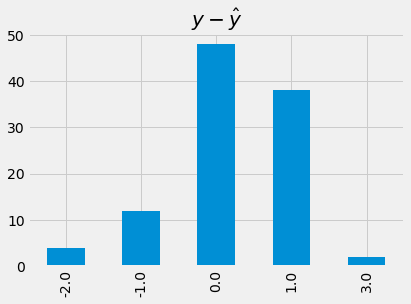

In [23]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.Series((sizes - predicted_sizes).flatten()).value_counts().sort_index().plot.bar(
    title='$y - \hat{y}$'
)

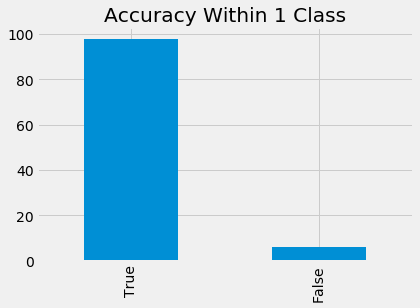

In [24]:
pd.Series(
    np.abs((sizes - predicted_sizes).flatten()) <= 1
).value_counts().plot.bar(title='Accuracy Within 1 Class')

Ручная реализация:

In [25]:
import numpy as np
import itertools

class PolynomialFeatures:
    def __init__(self, degree=2):
        self.degree = degree
    
    def fit_transform(self, X):
        nvars = X.shape[1]
        var_combos = []
        
        for i in range(0, self.degree):
            var_combos += itertools.combinations_with_replacement(set(range(nvars)), i + 1)
        
        mat = np.zeros((X.shape[0], len(var_combos)))
        
        for i, var_combo in enumerate(var_combos):
            mat[:, i] = np.prod(X[:, var_combo], axis=1)
        
        return mat
    

class LinearRegression:
    def __init__(self, degree=2):
        self.degree = degree
    
    def fit(self, X, y):
        self.betas = np.linalg.inv(X.T @ X) @ X.T @ y
        
    def predict(self, X):
        return X @ self.betas

In [26]:
poly = PolynomialFeatures(degree=2)
prices_poly = poly.fit_transform(prices)

clf = LinearRegression()
clf.fit(prices_poly, sizes)
predicted_sizes = np.round(clf.predict(prices_poly))

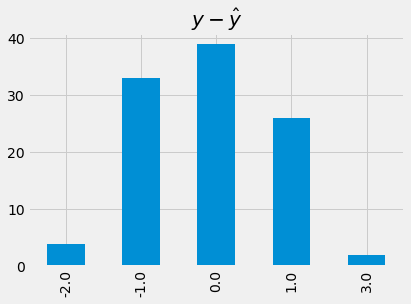

In [27]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.Series((sizes - predicted_sizes).flatten()).value_counts().sort_index().plot.bar(
    title='$y - \hat{y}$'
)

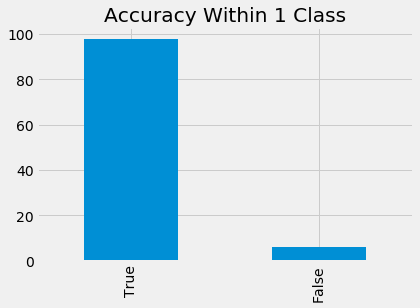

In [28]:
pd.Series(
    np.abs((sizes - predicted_sizes).flatten()) <= 1
).value_counts().plot.bar(title='Accuracy Within 1 Class')
